In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# load the dataset --- [food dataset]
data_set=pd.read_csv("mcdonalds.csv")

In [3]:
# decribe data_set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
data_set.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [5]:
data_set

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [6]:
# segment _ __feature


seg_feature = data_set.drop(data_set.columns[11:], axis=1)
features_columns=seg_feature.columns

In [7]:
descriptor_data=data_set.iloc[:,11:]

In [8]:
features_columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [9]:
# extracting segmentation columns only which is 11 in these case
data_set_seg=data_set.iloc[:,:11]

In [10]:
data_set_seg=data_set_seg.replace("Yes",1).replace("No",0)


In [11]:
data_set_seg

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [12]:
# converting data into matrix array
data_mat=np.array(data_set_seg)

In [13]:
data_mat

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [14]:
# checking shape
data_mat.shape

(1453, 11)

In [15]:
# checking if there isnt contain nan value
data_set.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [16]:
# calculating means
mean_of_feature=np.mean(data_mat,axis=0)

mean_df=pd.DataFrame(mean_of_feature.reshape(1,-1),columns=data_set_seg.columns)

In [17]:
mean_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.55265,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.35788,0.198899,0.242946


In [18]:

from factor_analyzer import Rotator


# Perform PCA
pca = PCA(n_components=11)
principal_components = pca.fit_transform(data_mat)

# Rotate the components [Varimax rotation]
rotator = Rotator(method='varimax')
rotated_components = rotator.fit_transform(principal_components)

# Standard deviations of the components
component_std = np.sqrt(pca.explained_variance_)

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of variance explained
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

#display
num_components = len(component_std)
for i in range(num_components):
    print(f"Component {i+1}:")
    print(f"Standard Deviation: {component_std[i]:.4f}")
    print(f"Proportion of Variance: {explained_variance_ratio[i]:.4f}")
    print(f"Cumulative Proportion: {cumulative_explained_variance[i]:.4f}")
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    print()



Component 1:
Standard Deviation: 0.7570
Proportion of Variance: 0.2994
Cumulative Proportion: 0.2994
--------------------------------------------------------------------
--------------------------------------------------------------------

Component 2:
Standard Deviation: 0.6075
Proportion of Variance: 0.1928
Cumulative Proportion: 0.4922
--------------------------------------------------------------------
--------------------------------------------------------------------

Component 3:
Standard Deviation: 0.5046
Proportion of Variance: 0.1330
Cumulative Proportion: 0.6253
--------------------------------------------------------------------
--------------------------------------------------------------------

Component 4:
Standard Deviation: 0.3988
Proportion of Variance: 0.0831
Cumulative Proportion: 0.7084
--------------------------------------------------------------------
--------------------------------------------------------------------

Component 5:
Standard Deviation: 0.3374


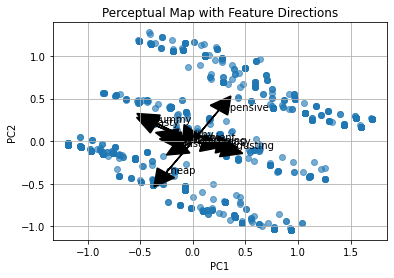

In [19]:


# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(data_mat)

# Get the feature directions from the principal components
feature_directions = pca.components_[:2].T

# Calculate the standard deviations of the components
component_std = np.sqrt(pca.explained_variance_)

# Create a scatter plot of the projected data
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.6)

# Add rays indicating the directions of the original features
feature_names = data_set_seg.columns
for i, direction in enumerate(feature_directions):
    plt.arrow(0, 0, component_std[0] * direction[0], component_std[1] * direction[1],
              head_width=0.2, head_length=0.2, linewidth=1.5, fc='black', ec='black')
    plt.text(component_std[0] * direction[0], component_std[1] * direction[1], feature_names[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map with Feature Directions')
plt.grid(True)
plt.show()


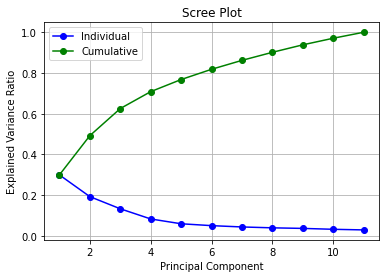

In [20]:
# Load sample dataset
# Perform PCA
pca = PCA(n_components=data_mat.shape[1])
pca.fit(data_mat)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', label='Individual')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, 'go-', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()


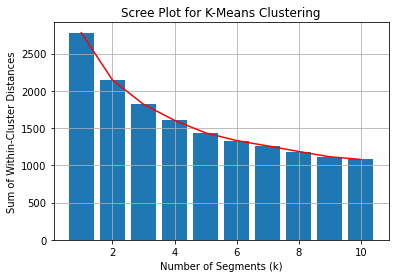

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load sample dataset


# Initialize lists to store the number of segments and sum of within-cluster distances
num_segments = []
sum_distances = []

# Perform k-means clustering for different numbers of segments (k)
for k in range(1, 11):  # Vary the range as per your requirements
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_mat)
    num_segments.append(k)
    sum_distances.append(kmeans.inertia_)

# Plot the sum of within-cluster distances vs. number of segments
plt.bar(num_segments, sum_distances)
plt.plot(num_segments,sum_distances,color="red")
plt.xlabel('Number of Segments (k)')
plt.ylabel('Sum of Within-Cluster Distances')
plt.title('Scree Plot for K-Means Clustering')
plt.grid(True)
plt.show()


In [22]:
# Another way ot check optimal number of segments
segment_range = range(2, 11)  # Vary the range as per your requirements

# Doing k-means clustering 
for num_segments in segment_range:
    kmeans = KMeans(n_clusters=num_segments)
    kmeans.fit(data_mat)
    inside_cluster_spread = kmeans.inertia_
    print(f"Number of Segments: {num_segments}, Within-Cluster Dispersion: {inside_cluster_spread}")


Number of Segments: 2, Within-Cluster Dispersion: 2145.503726917162
Number of Segments: 3, Within-Cluster Dispersion: 1818.7143021542465
Number of Segments: 4, Within-Cluster Dispersion: 1603.0604440558945
Number of Segments: 5, Within-Cluster Dispersion: 1455.8231130617228
Number of Segments: 6, Within-Cluster Dispersion: 1342.5064069412892
Number of Segments: 7, Within-Cluster Dispersion: 1248.1709417497677
Number of Segments: 8, Within-Cluster Dispersion: 1218.884491262181
Number of Segments: 9, Within-Cluster Dispersion: 1130.7633597215263
Number of Segments: 10, Within-Cluster Dispersion: 1062.8421533457574


In [34]:
# initlize previous label
kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(data_mat)
previous_labels = kmeans.labels_

In [35]:
### creating box plot where i use segment1 a initilized previous label;


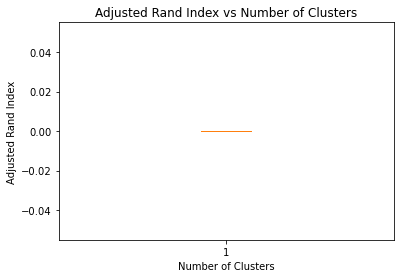

Number of clusters: 2, ARI: 0.0


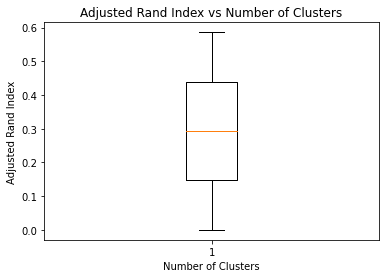

Number of clusters: 3, ARI: 0.5860546696648999


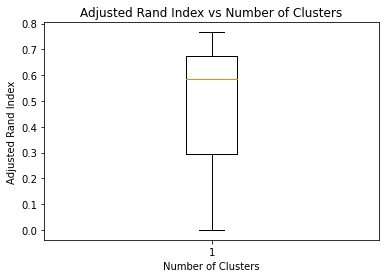

Number of clusters: 4, ARI: 0.7666349192236147


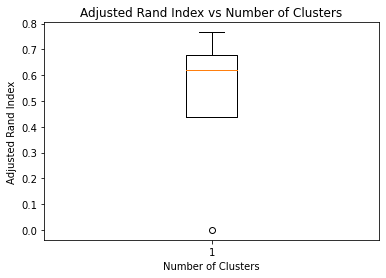

Number of clusters: 5, ARI: 0.6515215703387056


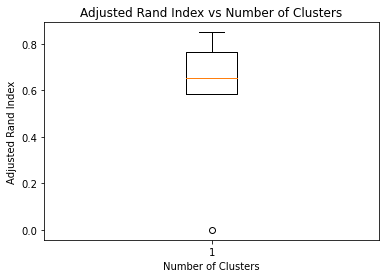

Number of clusters: 6, ARI: 0.85053048599765


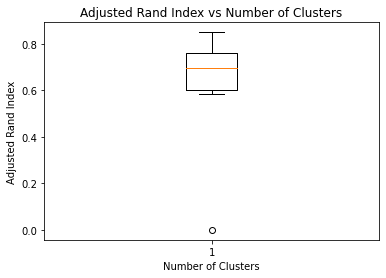

Number of clusters: 7, ARI: 0.7411105813977102


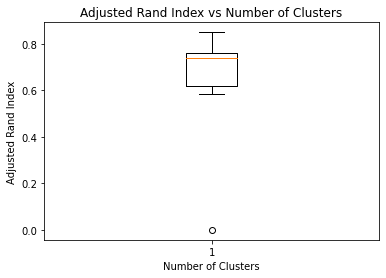

Number of clusters: 8, ARI: 0.7541386146401683


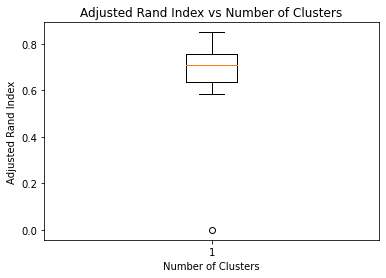

Number of clusters: 9, ARI: 0.6802410547670606


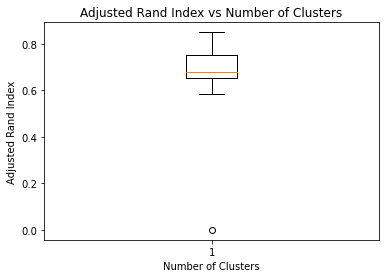

Number of clusters: 10, ARI: 0.6645618722303538


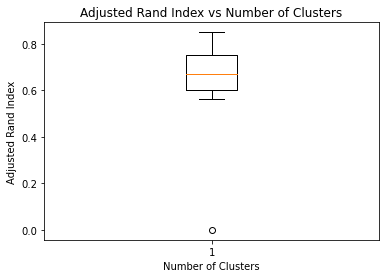

Number of clusters: 11, ARI: 0.5648714188166911


ValueError: Dimensions of labels and X must be compatible

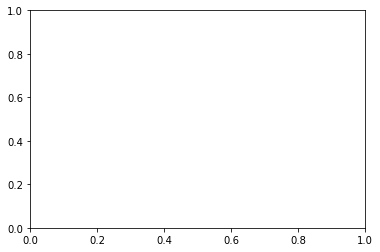

In [36]:

from sklearn import metrics
min_clusters = 2
max_clusters = 11

rand_idx_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_mat)

    if previous_labels is not None:
        ridx = metrics.adjusted_rand_score(previous_labels, labels)
        rand_idx_scores.append(ridx)
        # Generate box plot
        plt.boxplot([rand_idx_scores])
        plt.xlabel('Number of Clusters')
        plt.ylabel('Adjusted Rand Index')
        plt.title('Adjusted Rand Index vs Number of Clusters')
        plt.show()

        print(f"Number of clusters: {n_clusters}, ARI: {ridx}")
    
    previous_labels = labels

# Generate the final box plot
# Generate the final box plot
plt.boxplot(rand_idx_scores, labels=np.arange(min_clusters, max_clusters + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs Number of Clusters')
plt.show()


In [38]:

unique_labels = np.unique(labels)

# Create an empty list to store the segment data
segment_data = []

# Iterate over each unique cluster label
for label in unique_labels:
    segment_points = data_mat[labels == label]
    # Append the segment points to the segment data list
    segment_data.append(segment_points)

# Convert the segment data list to a numpy array
segment_data =np.array(segment_data)


C:\Users\Anand\AppData\Local\Temp\ipykernel_2832\519830064.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  segment_data =np.array(segment_data)


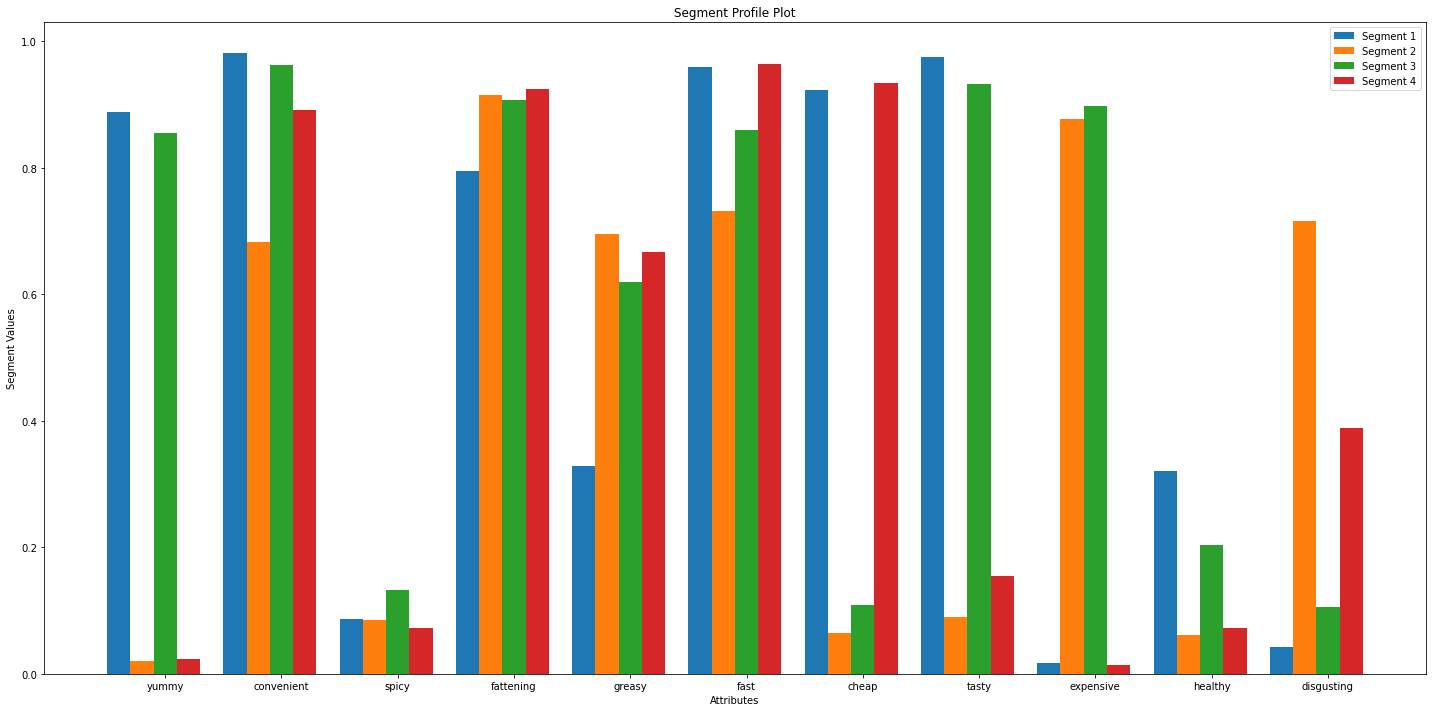

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming your dataset is named 'df' with 1453 rows and 11 columns
# Assuming you have performed K-means clustering and obtained the cluster labels in 'labels'

# Step 1: Prepare your dataset
attribute_data = data_mat

# Step 2: Perform K-means clustering for segment assignment
n_clusters = 4  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(attribute_data)
labels = kmeans.labels_

# Step 3: Create segment profile plot
segment_profiles = []

for i in range(n_clusters):
    segment_values = attribute_data[labels == i]
    segment_mean = segment_values.mean(axis=0)
    segment_profiles.append(segment_mean)

segment_profiles = np.array(segment_profiles)

n_segments, n_attributes = segment_profiles.shape

fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.2
index = np.arange(n_attributes)

for i in range(n_segments):
    ax.bar(index + (i * bar_width), segment_profiles[i], bar_width, label=f'Segment {i+1}')

ax.set_xticks(index + (n_segments * bar_width) / 2)
ax.set_xticklabels(data_set_seg.columns)
plt.xlabel('Attributes')
plt.ylabel('Segment Values')
plt.title('Segment Profile Plot')
plt.legend()
plt.tight_layout()
plt.show()


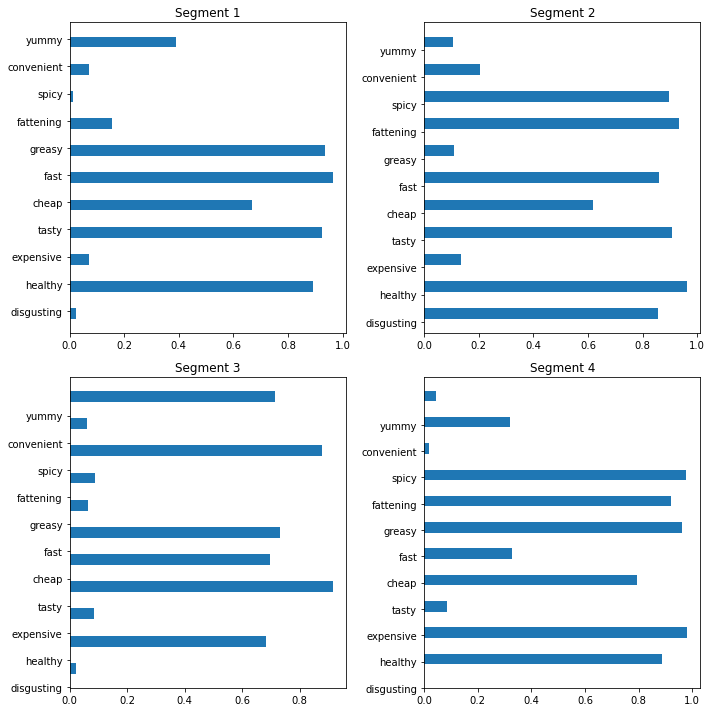

In [134]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
bar_width = 0.4
index = np.arange(n_attributes)

# Reverse the order of segment_profiles to align with y-axis labels
segment_profiles = segment_profiles[::-1]

for i in range(n_segments):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.barh(index + (i * bar_width), segment_profiles[i], bar_width)
    ax.set_yticks(index -0.7+ (n_segments * bar_width) / 2)
    ax.set_yticklabels(data_set_seg.columns[::-1])  # Reverse the order of feature labels
    ax.set_title(f'Segment {i+1}')

plt.tight_layout()
plt.show()


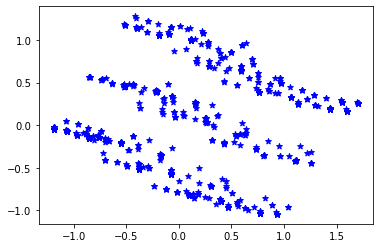

In [135]:
# Doing principal component and plot scatter plot for profiling

pca=PCA(n_components=2)
pc=pca.fit_transform(data_mat)
comp=pca.components_
plt.scatter(pc[:,0],pc[:,1],color="blue",marker="*")
plt.show()

In [136]:
pca_data=pd.DataFrame({"PC1":pc[:,0],"PC2":pc[:,1]})

In [137]:
pca_df=pd.concat([pca_data,pd.DataFrame({"cluster":labels})],axis=1)

In [138]:
pca_df

,PC1,PC2,cluster
0,0.425367,-0.219079,3
1,-0.218638,0.388190,2
2,0.375415,0.730435,2
3,-0.172926,-0.352752,0
4,0.187057,-0.807610,3
...,...,...,...
1448,1.550242,0.275031,1
1449,-0.957339,0.014308,0
1450,-0.185894,1.062662,2
1451,-1.182064,-0.038570,0


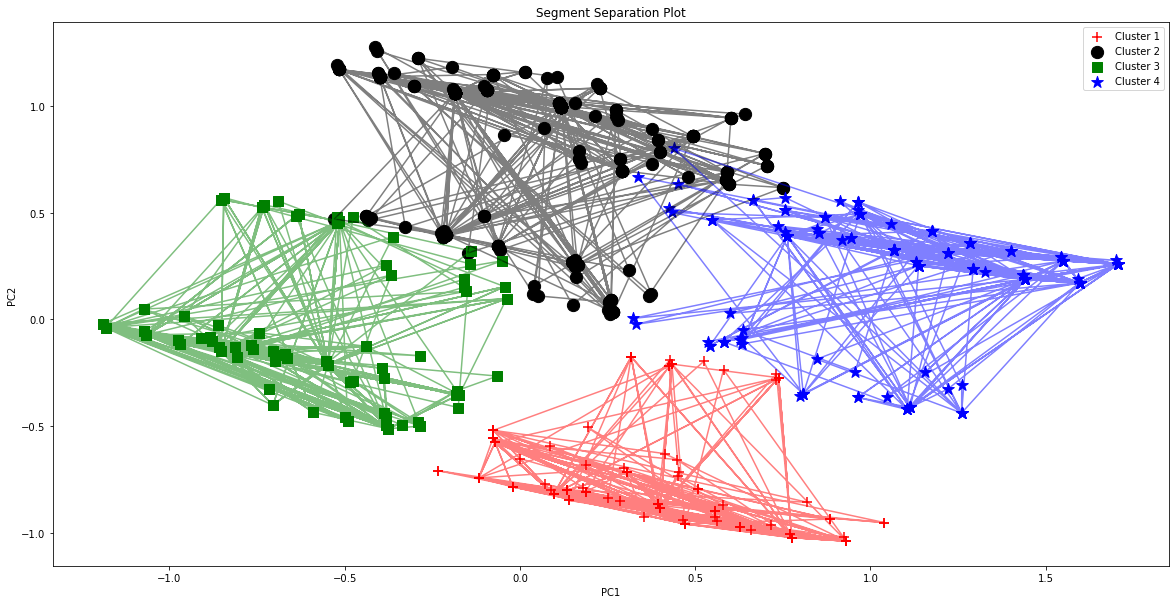

In [139]:
plt.figure(figsize=(20, 10))
segments = pca_df["cluster"].unique()

colors = ["red", "black", "green", "blue"]  # Modify or add more colors as needed
markers = ["+", "o", "s", "*"]  # Modify or add more markers as needed
labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]  # Modify or add more labels as needed
sizes = [100, 150, 120, 150]  # Modify or add more sizes as needed

for i, segment in enumerate(segments):
    segment_data = pca_df[pca_df["cluster"] == segment]

    plt.scatter(segment_data["PC1"], segment_data["PC2"], color=colors[i % len(colors)],marker=markers[i % len(markers)], s=sizes[i % len(sizes)], label=labels[i % len(labels)])
    
    plt.plot(segment_data["PC1"], segment_data["PC2"], color=colors[i % len(colors)], linestyle="-", alpha=0.5)
    
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Segment Separation Plot")
plt.show()



In [140]:
# Here i joined line to make visible dense area of each segment  as they seems to in same plane

In [141]:

des_var=data_set["Like"].unique()
des_var

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [142]:
# Prepare the data for the mosaic plot
cluster_labels = pca_df["cluster"]  # Cluster/Segment labels for each data point
descriptor_features = data_set["Like"]  # Descriptor features/categories for each data point

# Create a DataFrame for the mosaic plot
mosaic_df = pd.DataFrame({'cluster': cluster_labels,
                          'descriptor': descriptor_features})

In [143]:
mosaic_df

,cluster,descriptor
0,3,-3
1,2,+2
2,2,+1
3,0,+4
4,3,+2
...,...,...
1448,1,I hate it!-5
1449,0,+2
1450,2,+3
1451,0,+4


In [144]:
mosaic_df = mosaic_df.groupby(['cluster', 'descriptor']).size().reset_index(name='count')

In [145]:
mosaic_df

,cluster,descriptor,count
0,0,+1,65
1,0,+2,90
2,0,+3,143
3,0,+4,111
4,0,-1,13
5,0,-2,6
6,0,-3,2
7,0,-4,4
8,0,0,43
9,0,I hate it!-5,4


In [146]:
#plot for like descriptor variable
#######LIKE###3

<Figure size 720x432 with 0 Axes>

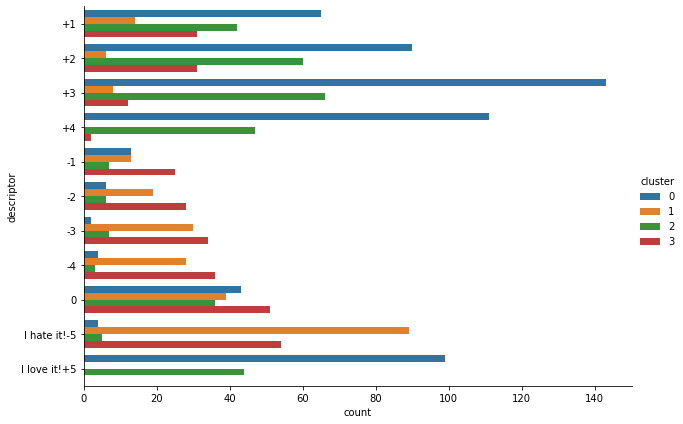

In [147]:
#set the plot size
plt.figure(figsize=(10, 6))

# Create the mosaic plot using seaborn
sns.catplot(data=mosaic_df, y='descriptor', x='count', hue='cluster',
            kind='bar', height=6, aspect=1.5, orient='horizontal')

# Show the plot
plt.show()

In [148]:
# now same for second descriptor variable
######GENDER####

In [149]:
cluster=pca_df["cluster"]
descri_gen=data_set["Gender"]
mosaic_df_gen=pd.DataFrame({"cluster":cluster,"descriptor(GENDER)":descri_gen})

In [150]:
mosaic_df_gen

,cluster,descriptor(GENDER)
0,3,Female
1,2,Female
2,2,Female
3,0,Female
4,3,Male
...,...,...
1448,1,Male
1449,0,Female
1450,2,Female
1451,0,Male


In [151]:
mosaic_df_gen = mosaic_df_gen.groupby(['cluster', 'descriptor(GENDER)']).size().reset_index(name='count')

In [152]:
mosaic_df_gen

,cluster,descriptor(GENDER),count
0,0,Female,349
1,0,Male,231
2,1,Female,106
3,1,Male,140
4,2,Female,154
5,2,Male,169
6,3,Female,179
7,3,Male,125


<Figure size 720x432 with 0 Axes>

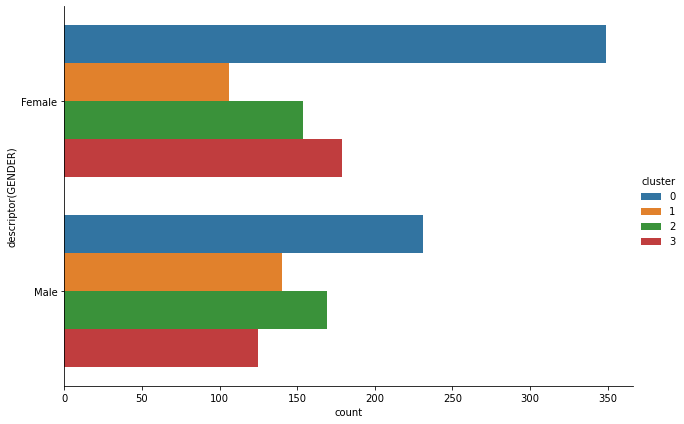

In [153]:
#set the plot size
plt.figure(figsize=(10, 6))

# Create the mosaic plot using seaborn
sns.catplot(data=mosaic_df_gen, y='descriptor(GENDER)', x='count', hue='cluster',
            kind='bar', height=6, aspect=1.5, orient='horizontal')

# Show the plot
plt.show()

<Figure size 720x1440 with 0 Axes>

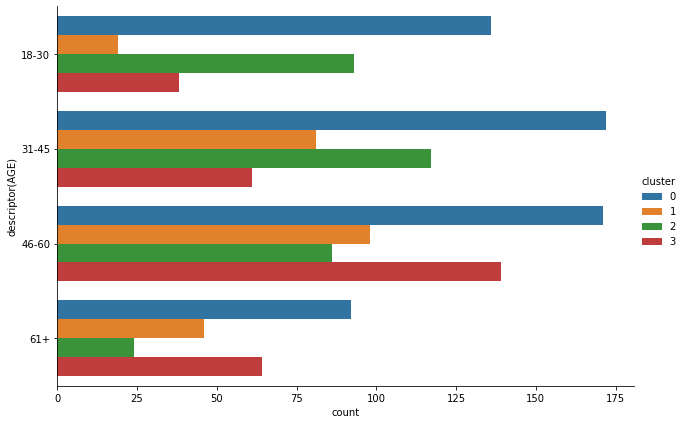

In [154]:
#Define the age ranges
age_ranges = ['18-30', '31-45', '46-60', '61+']

# Group the 'Age' variable into ranges
age_groups = pd.cut(data_set['Age'], bins=[18, 30, 45, 60, data_set['Age'].max()+1], labels=age_ranges)

# Prepare the data for the mosaic plot
cluster_labels = pca_df["cluster"]
descriptor_age = age_groups

# Create a DataFrame for the mosaic plot
mosaic_df_age = pd.DataFrame({'cluster': cluster_labels,
                              'descriptor(AGE)': descriptor_age})

# Compute the count/frequency for each combination of cluster and age range
mosaic_df_age = mosaic_df_age.groupby(['cluster', 'descriptor(AGE)']).size().reset_index(name='count')

# Set the plot size
plt.figure(figsize=(10, 20))

# Create the mosaic plot using seaborn
sns.catplot(data=mosaic_df_age, y='descriptor(AGE)', x='count', hue='cluster',
            kind='bar', height=6, aspect=1.5, orient='horizontal')

# Show the plot
plt.show()

In [155]:
mosaic_df_age

,cluster,descriptor(AGE),count
0,0,18-30,136
1,0,31-45,172
2,0,46-60,171
3,0,61+,92
4,1,18-30,19
5,1,31-45,81
6,1,46-60,98
7,1,61+,46
8,2,18-30,93
9,2,31-45,117


In [156]:

descriptor_data

,Like,Age,VisitFrequency,Gender
0,-3,61,Every three months,Female
1,+2,51,Every three months,Female
2,+1,62,Every three months,Female
3,+4,69,Once a week,Female
4,+2,49,Once a month,Male
...,...,...,...,...
1448,I hate it!-5,47,Once a year,Male
1449,+2,36,Once a week,Female
1450,+3,52,Once a month,Female
1451,+4,41,Every three months,Male


In [190]:
desc_df=pd.concat([descriptor_data,pd.DataFrame({"cluster":pca_df["cluster"]})],axis=1)

In [191]:
desc_df

,Like,Age,VisitFrequency,Gender,cluster
0,-3,61,Every three months,Female,3
1,+2,51,Every three months,Female,2
2,+1,62,Every three months,Female,2
3,+4,69,Once a week,Female,0
4,+2,49,Once a month,Male,3
...,...,...,...,...,...
1448,I hate it!-5,47,Once a year,Male,1
1449,+2,36,Once a week,Female,0
1450,+3,52,Once a month,Female,2
1451,+4,41,Every three months,Male,0


In [193]:
# preprocessing descriptor data
desc_df["Like"].replace({"I hate it!-5": -5, "I love it!+5": +5}, inplace=True)

In [194]:
desc_df["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)


In [195]:
#desc_df["VisitFrequency"].replace({"Every three months": 330, "Once a week": 17,"Once a month":130,"Once a year":1365,"More than once a week":2, "Never":0}, inplace=True)

In [196]:
vf=desc_df["VisitFrequency"].unique()

In [197]:
desc_df# here in visit frequency columns first digit tell how much in freqs then other digit tell month,year or weeks on 

,Like,Age,VisitFrequency,Gender,cluster
0,-3,61,Every three months,0,3
1,+2,51,Every three months,0,2
2,+1,62,Every three months,0,2
3,+4,69,Once a week,0,0
4,+2,49,Once a month,1,3
...,...,...,...,...,...
1448,-5,47,Once a year,1,1
1449,+2,36,Once a week,0,0
1450,+3,52,Once a month,0,2
1451,+4,41,Every three months,1,0


In [170]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Like            1453 non-null   object
 1   Age             1453 non-null   int64 
 2   VisitFrequency  1453 non-null   int64 
 3   Gender          1453 non-null   int64 
 4   cluster         1453 non-null   int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 51.2+ KB


In [198]:

desc_df['Like'] = pd.to_numeric(desc_df['Like'])

In [199]:

desc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Like            1453 non-null   int64 
 1   Age             1453 non-null   int64 
 2   VisitFrequency  1453 non-null   object
 3   Gender          1453 non-null   int64 
 4   cluster         1453 non-null   int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 51.2+ KB


In [175]:
# selecting data segment for each segment
seg_list=[]
for i in  range(4):
    data=desc_df[desc_df["cluster"]==i]
    seg_list.append(data)
    

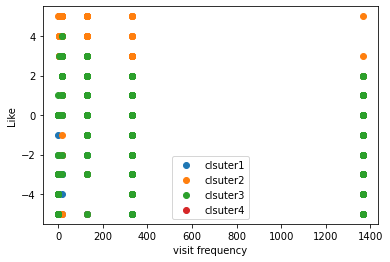

In [201]:
labels=["clsuter1","clsuter2","clsuter3","clsuter4"]
for i,seg in enumerate(seg_list):
    plt.scatter(seg["VisitFrequency"],seg["Like"],label=labels[i])

plt.legend()
plt.xlabel("visit frequency")
plt.ylabel("Like")
plt.show()



In [ ]:
######################## END####################################################